In [103]:
import nltk

In [104]:
#nltk.download_shell()

In [105]:
message = [line.rstrip() for line in open('SMSSpamCollection')]

In [106]:
len(message)
import pandas as pd
import numpy as np

In [107]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [108]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [109]:
messages['length']= messages['message'].apply(len)

In [110]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [111]:
import seaborn as sns

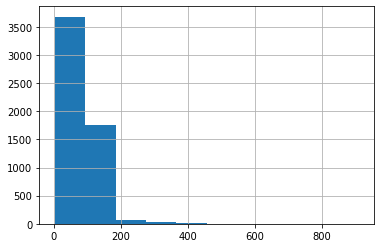

In [112]:
messages['length'].hist()

# part two (2)

In [113]:
import string

In [114]:
mess  = 'simple message! notice: it has punctuations.'

In [115]:
nopunc1 = [c for c in mess if c not in string.punctuation]

In [116]:
nopunc2 = ''.join(nopunc1)

In [117]:
nopunc2

'simple message notice it has punctuations'

In [118]:
from nltk.corpus import stopwords

In [119]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [120]:
nopunc = ''.join(nopunc)

In [121]:
nopunc

'simple message notice it has punctuations'

In [122]:
x = ['acdd', 'b','c','d','e']

In [123]:
' '.join(x)

'acdd b c d e'

In [124]:
nopunc.split()

['simple', 'message', 'notice', 'it', 'has', 'punctuations']

In [125]:
clean_mess =  [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [126]:
clean_mess

['simple', 'message', 'notice', 'punctuations']

In [127]:
#checking for stopwords.word('english')

nopunc2.split()

['simple', 'message', 'notice', 'it', 'has', 'punctuations']

In [128]:
clean_msg =[word for word in nopunc2.split() if word.lower() not in stopwords.words('english')]

In [129]:
clean_msg

['simple', 'message', 'notice', 'punctuations']

# tokenisation

In [130]:
def text_process(mess):
    """
   1. remove punc
    2. remove stop words
    3. return list of clean text words
   """ 
    
   # ***
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

messages.head()

In [131]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [132]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# next step is vectorization

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

In [134]:
bow_transformer = CountVectorizer(analyzer = text_process)
#.fit(messages['message'])

In [135]:
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x00000198E1862C18>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [136]:
print(len(bow_transformer.vocabulary_))

11425


In [137]:
mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [138]:
bow4 = bow_transformer.transform([mess4])

In [139]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [140]:
bow_transformer.get_feature_names()[9554]

'say'

In [141]:
bow_transformer.get_feature_names()[4068]

'U'

# PART 3

In [142]:
#transforming the messages


In [143]:
message_bow = bow_transformer.transform(messages['message'])

In [144]:
print('shape of Sparse Matrix: ', message_bow.shape)

shape of Sparse Matrix:  (5572, 11425)


In [145]:
message_bow.nnz

50548

In [146]:
sparsity = (100.0*message_bow.nnz / (message_bow.shape[0] * message_bow.shape[1]))

In [147]:
print('sparsity: {} '.format((sparsity)))

sparsity: 0.07940295412668218 


# TF-IDF : term frequency-inverse document frequency

In [148]:
from sklearn.feature_extraction.text import TfidfTransformer

In [149]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [150]:
tfidf4 = tfidf_transformer.transform(bow4)

In [151]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [152]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [153]:
from sklearn.feature_extraction.text import TfidfTransformer

In [154]:
tfidf_transform = TfidfTransformer().fit(message_bow)

In [156]:
tfidf44 = tfidf_transform.transform(bow4)

In [157]:
print(tfidf44)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [159]:
print(tfidf_transform.idf_[bow_transformer.vocabulary_['u']])

3.2800524267409408


In [160]:
print(tfidf_transform.idf_[bow_transformer.vocabulary_['university']])

8.527076498901426


# training of our model

In [166]:
#transforming the entire message 
#in to erm frequency-inverse document frequency

message_tfidf = tfidf_transformer.transform(message_bow)

In [170]:
print(message_tfidf.shape)

(5572, 11425)


In [171]:
from sklearn.naive_bayes import MultinomialNB

In [175]:
spam_detect_model = MultinomialNB().fit(message_tfidf, messages['label'])

In [185]:
#testing predicting
spam_detect_model.predict(tfidf44)[0]

'ham'

In [186]:
messages['label'][3]

'ham'

In [188]:
message_tfidf

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [189]:
all_pred = spam_detect_model.predict(message_tfidf)

In [190]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# using train_test_split(

In [191]:
from sklearn.model_selection import train_test_split

In [194]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size =0.3)

In [209]:
#msg_test

# using pipeline to summarise all the steps

In [198]:
from sklearn.pipeline import Pipeline

In [201]:
#pipeline helps us to shorten all previous steps
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [226]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000198E1862C18>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [222]:
#predictions = pipeline.predict(msg_test)

In [220]:
#pipeline.predict(msg_test)

In [225]:
len(msg_test)

1672